In [1]:
import pandas as pd
import seaborn as sns # for visualisation 
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv("cleaned_vac_data.csv")
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309967 entries, 0 to 309966
Data columns (total 19 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    309967 non-null  object 
 1   continent                                   309967 non-null  object 
 2   location                                    309967 non-null  object 
 3   date                                        309967 non-null  object 
 4   total_vaccinations                          309967 non-null  float64
 5   people_vaccinated                           309967 non-null  float64
 6   people_fully_vaccinated                     309967 non-null  float64
 7   new_vaccinations                            309967 non-null  float64
 8   new_vaccinations_smoothed                   309967 non-null  float64
 9   total_vaccinations_per_hundred              309967 non-null  float64
 

1. Which country has most number of fully vaccinated people?

-----

In [4]:
cols = ['location', 'people_fully_vaccinated']
full_vac = df[cols].groupby('location')['people_fully_vaccinated'].max().sort_values(ascending=0).head(15)
# full_vac
full_vac = full_vac.reset_index()
full_vac

,location,people_fully_vaccinated
0,China,1.276760e+09
1,India,9.519799e+08
2,United States,2.306373e+08
3,Brazil,1.761642e+08
4,Indonesia,1.748932e+08
5,Bangladesh,1.417392e+08
6,Pakistan,1.404710e+08
7,Japan,1.033803e+08
8,Vietnam,8.596156e+07
9,Mexico,8.184996e+07


/Users/ingridlewah/opt/anaconda3/envs/dev2/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ingridlewah/opt/anaconda3/envs/dev2/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ingridlewah/opt/anaconda3/envs/dev2/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/ll/tr3z9w091y55mt3_qxw9k4gr0000gn/T/ipykernel_26357/1257862814.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorba

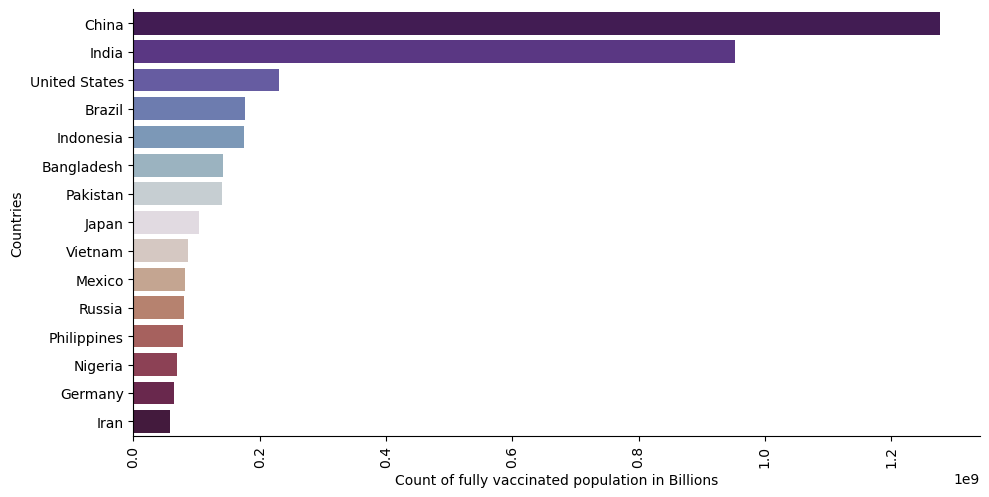

In [41]:
# visualisation using seaborn and matplotlib
# full_vac.to_frame()
sns.catplot(x='people_fully_vaccinated', y='location', data=full_vac, kind='bar', ci=None, palette='twilight_shifted', legend_out=False, aspect=2, orient='h')
plt.xlabel('Count of fully vaccinated population in Billions')
plt.ylabel('Countries')
plt.xticks(rotation=90)
plt.show()

/Users/ingridlewah/opt/anaconda3/envs/dev2/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ingridlewah/opt/anaconda3/envs/dev2/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ingridlewah/opt/anaconda3/envs/dev2/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/ll/tr3z9w091y55mt3_qxw9k4gr0000gn/T/ipykernel_28905/3193902010.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorba

<Figure size 1600x1000 with 0 Axes>

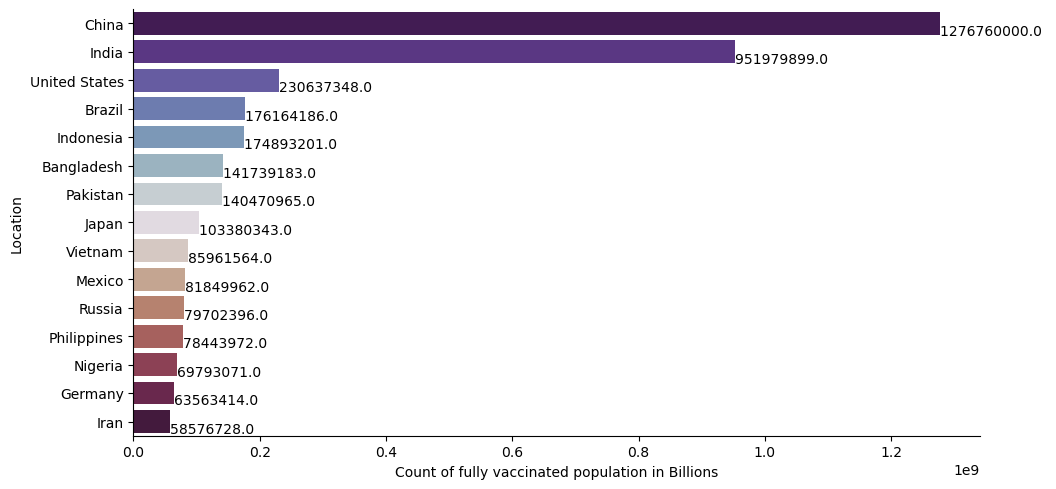

In [6]:
plt.figure(figsize=(16,10))

fg = sns.catplot(x='people_fully_vaccinated', y='location', data=full_vac, kind='bar', ci=None, palette='twilight_shifted', legend_out=False, aspect=2, orient='h')
plt.xlabel('Count of fully vaccinated population in Billions')
plt.ylabel('Location')

# Iterate through each Axes in the FacetGrid
for ax in fg.axes.flat:
    for patch in ax.patches:
        width = patch.get_width()
        height = patch.get_height()
        x = patch.get_x()
        y = patch.get_y()

        plt.text(width + x, height + y, '{:.1f} '.format(width))

plt.show()


In [40]:
# How to Get Top 10 Highest or Lowest Values in Pandas 
# df_top15 = df.loc[df['total_vaccinations'].nlargest(n=15).index].reset_index(drop=True)
df_top15 = df.loc[df['people_fully_vaccinated'].nlargest(n=15).index].reset_index(drop=True)
df_top15

,iso_code,continent,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,population,day,month,year
0,CHN,Asia,China,09/02/2023,3.491077e+09,1.310292e+09,1.276760e+09,0.0,94000.0,244.84,91.89,89.54,66.0,3571.0,0.000,1425887360,9,2,2023
1,CHN,Asia,China,02/02/2023,3.490419e+09,1.310267e+09,1.276661e+09,0.0,96143.0,244.79,91.89,89.53,67.0,8571.0,0.001,1425887360,2,2,2023
2,CHN,Asia,China,26/01/2023,3.489746e+09,1.310207e+09,1.276549e+09,0.0,33143.0,244.74,91.89,89.53,23.0,2571.0,0.000,1425887360,26,1,2023
3,CHN,Asia,China,19/01/2023,3.489514e+09,1.310189e+09,1.276517e+09,0.0,268000.0,244.73,91.89,89.52,188.0,13286.0,0.001,1425887360,19,1,2023
4,CHN,Asia,China,12/01/2023,3.487638e+09,1.310096e+09,1.276302e+09,1569000.0,933857.0,244.59,91.88,89.51,655.0,95800.0,0.007,1425887360,12,1,2023
5,CHN,Asia,China,13/12/2022,3.451677e+09,1.307222e+09,1.274018e+09,1433000.0,967286.0,242.07,91.68,89.35,678.0,172733.0,0.012,1425887360,13,12,2022
6,CHN,Asia,China,28/11/2022,3.443451e+09,1.304631e+09,1.272830e+09,124000.0,130286.0,241.50,91.50,89.27,91.0,33292.0,0.002,1425887360,28,11,2022
7,CHN,Asia,China,04/11/2022,3.440231e+09,1.303832e+09,1.272227e+09,112000.0,100857.0,241.27,91.44,89.22,71.0,18259.0,0.001,1425887360,4,11,2022
8,CHN,Asia,China,12/10/2022,3.437851e+09,0.000000e+00,1.271711e+09,123000.0,90429.0,241.10,0.00,89.19,63.0,18259.0,0.001,1425887360,12,10,2022
9,CHN,Asia,China,28/09/2022,3.436630e+09,0.000000e+00,1.271408e+09,136000.0,130143.0,241.02,0.00,89.17,91.0,18259.0,0.001,1425887360,28,9,2022


2. Top 30 countries with highest vaccination count since vaccination started

----

In [12]:
cols = ['location', 'total_vaccinations']
total_vac = df[cols].groupby('location')['total_vaccinations'].max().sort_values(ascending=0).head(30)
total_vac = total_vac.reset_index()
total_vac

,location,total_vaccinations
0,China,3.491077e+09
1,India,2.206718e+09
2,United States,6.767288e+08
3,Brazil,4.864364e+08
4,Indonesia,4.475958e+08
5,Japan,3.837477e+08
6,Bangladesh,3.610753e+08
7,Pakistan,3.398357e+08
8,Vietnam,2.664921e+08
9,Mexico,2.231590e+08


/Users/ingridlewah/opt/anaconda3/envs/dev2/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ingridlewah/opt/anaconda3/envs/dev2/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ingridlewah/opt/anaconda3/envs/dev2/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/ll/tr3z9w091y55mt3_qxw9k4gr0000gn/T/ipykernel_28905/1853925558.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorba

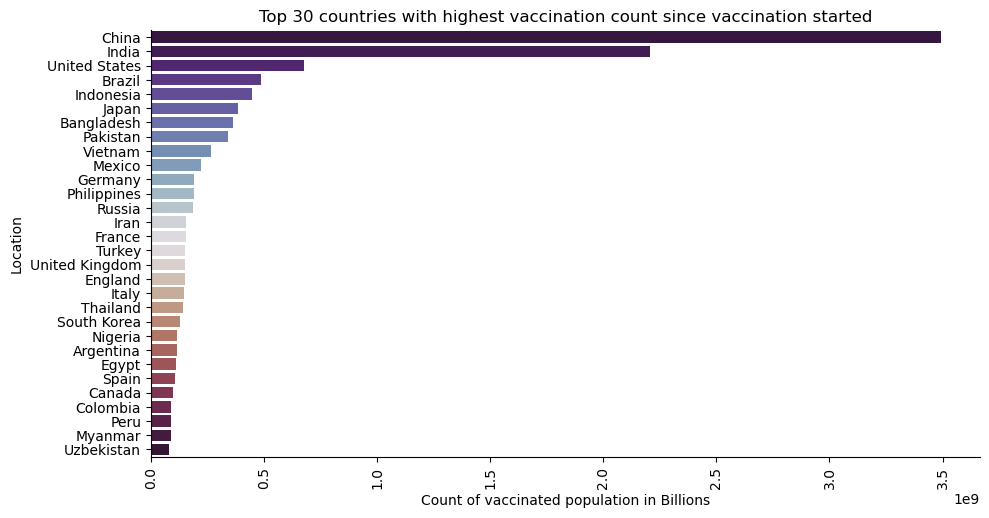

In [15]:
# visualisation using seaborn and matplotlib
sns.catplot(x='total_vaccinations', y='location', data=total_vac, kind='bar', ci=None, palette='twilight_shifted', legend_out=False, aspect=2, orient='h')
plt.xlabel('Count of vaccinated population in Billions')
plt.ylabel('Location')
plt.title('Top 30 countries with highest vaccination count since vaccination started')
plt.xticks(rotation=90)
plt.show()


3. Which country is vaccinating its citizens the fastest?

4. Top 30 countries that are vaccinated per hundered?

-----

In [16]:
cols = ['location', 'total_vaccinations_per_hundred']
total_vac_100 = df[cols].groupby('location')['total_vaccinations_per_hundred'].max().sort_values(ascending=0).head(30)
total_vac_100 = total_vac_100.reset_index()
total_vac_100

,location,total_vaccinations_per_hundred
0,Gibraltar,406.43
1,Cuba,404.90
2,Chile,319.78
3,Japan,309.59
4,Brunei,287.99
5,Taiwan,285.05
6,Tokelau,283.89
7,Qatar,282.33
8,Guernsey,281.90
9,Wales,281.68


/Users/ingridlewah/opt/anaconda3/envs/dev2/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ingridlewah/opt/anaconda3/envs/dev2/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ingridlewah/opt/anaconda3/envs/dev2/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/ll/tr3z9w091y55mt3_qxw9k4gr0000gn/T/ipykernel_28905/459837184.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar

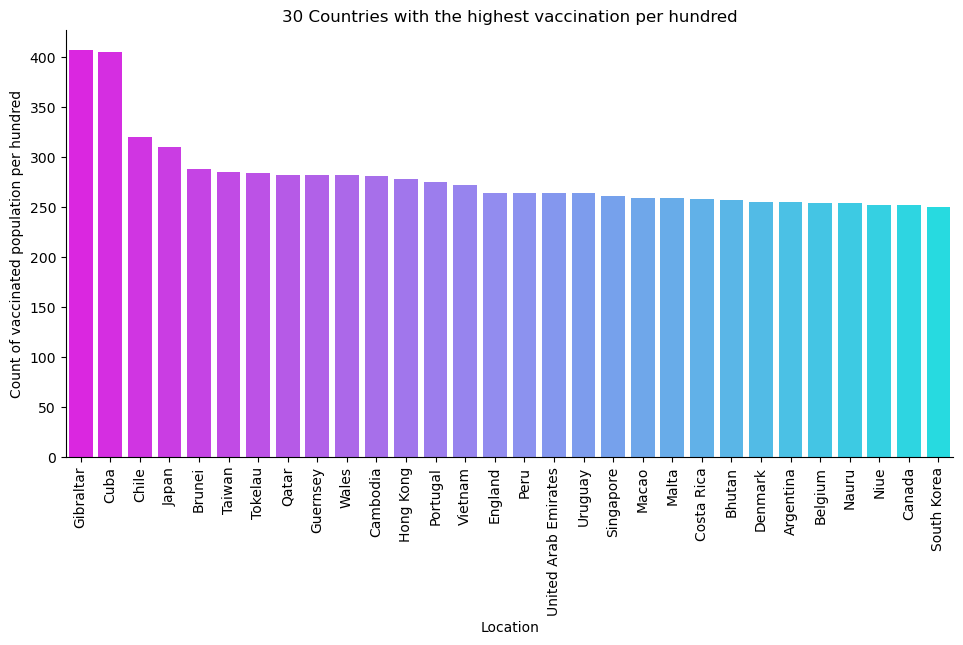

In [18]:
sns.catplot(data=total_vac_100, x='location', y='total_vaccinations_per_hundred',kind='bar',palette='cool_r' ,ci=None, legend_out=False,aspect =2)
plt.ylabel('Count of vaccinated population per hundred')
plt.xlabel('Location')
plt.title('30 Countries with the highest vaccination per hundred')
plt.xticks(rotation=90)
plt.show()

5. December Vs January Vs February comparision between top 30 countries